# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [47]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



In [48]:
data['Attrition'].value_counts(normalize=True)

0    0.675
1    0.325
Name: Attrition, dtype: float64

이직률이 32.5%

# 2.범주-->범주

In [49]:
target = 'Attrition'

## (1) Gender --> Attrition

In [50]:
feature = 'Gender'

* 교차표

In [51]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [52]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

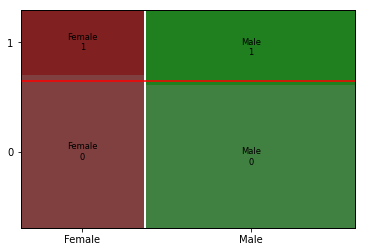

In [53]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

전체평균대비 이직률 여자가 조금낮고 남자가 조금 높다

* 수치화 : 카이제곱검정

In [54]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1


* 파악된 내용을 기술해 봅시다.

- 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

## (2) JobSatisfaction --> Attrition

* 교차표

In [55]:
feature='JobSatisfaction'
target='Attrition'
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [56]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

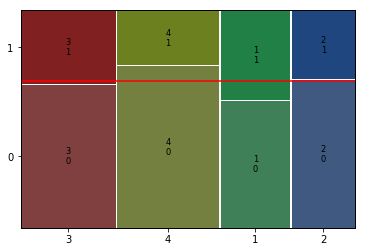

In [57]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r') # data[target].mean() 이직률
plt.show()

- 데이터 들어간 순서 / 조절은 정렬하고 집어넣으면됨 data.sort_values() 
- 1 이직률 / 0 잔존율
- x축 1이 이직률 높다

* 수치화 : 카이제곱검정

In [58]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3


* 파악된 내용을 기술해 봅시다.

- 카이제곱 검정시 유효하다
- 직무만족따라 이직여부 관련 있다

## (3) MaritalStatus --> Attrition

* 교차표

In [59]:
data.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'EmployeeNumber', 'Gender',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'TotalWorkingYears'],
      dtype='object')

In [60]:
feature='MaritalStatus'
target='Attrition'
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


In [61]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.794643,0.748175,0.518692
1,0.205357,0.251825,0.481308


* 시각화

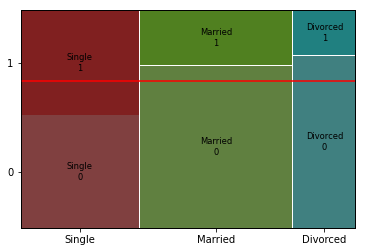

In [62]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [63]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
자유도 2


* 파악된 내용을 기술해 봅시다.

- 카이제곱 검정시 유효하다 / 결혼상태와 이직은 연관이 있다고 볼수있다

## (4) OverTime --> Attrition

* 교차표

In [64]:
feature='OverTime'
target='Attrition'
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


In [65]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

OverTime,No,Yes
Attrition,,
0,0.777778,0.461538
1,0.222222,0.538462


* 시각화

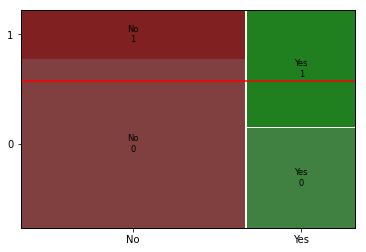

In [66]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

- yes가 이직률 높다 / no는 낮다

* 수치화 : 카이제곱검정

In [67]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
# print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
자유도 1


* 파악된 내용을 기술해 봅시다.

- 카이제곱검정시 유효하므로
- 야근할수록 이직을 많이하고, 야근을 덜할수록 이직을 적게했다

# =====================

# 3.숫자-->범주

## (1) Age --> Attrition

In [68]:
feature = 'Age'

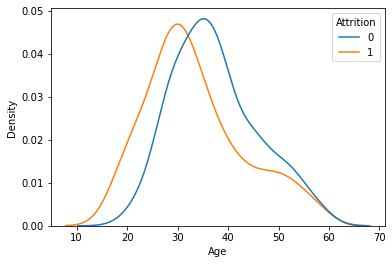

In [69]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

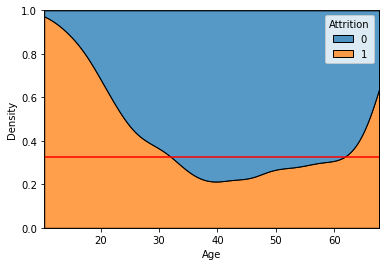

In [70]:
sns.kdeplot(x= feature, data = data, hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

나이대 분석결과 이직률이 전체평균보다 높고, 30대 이상은 이직률이 전체평균보다 낮다

## (2) DistanceFromHome --> Attrition

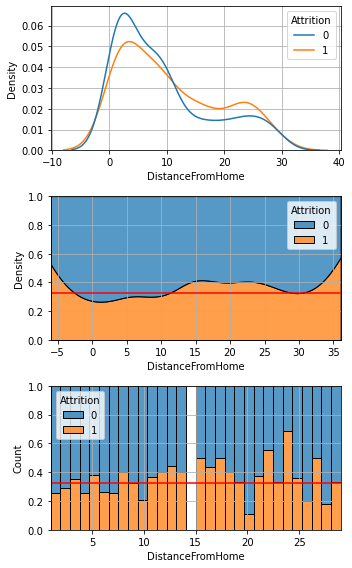

In [80]:
feature = 'DistanceFromHome' 
plt.figure(figsize = (5, 8)) 
plt.subplot(3,1,1) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False) 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,2) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,3) 
sns.histplot(x=feature, data = data, bins = 30, hue ='Attrition', multiple = 'fill') 
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 
plt.tight_layout() 
plt.show()

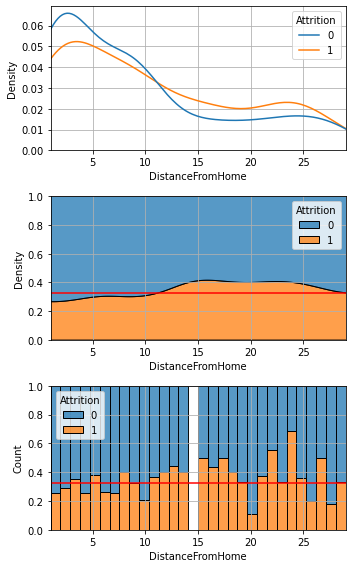

In [82]:
#2 강사
feature = 'DistanceFromHome' 
plt.figure(figsize = (5, 8)) 
plt.subplot(3,1,1) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False) 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,2) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,3) 
sns.histplot(x=feature, data = data, bins = 30, hue ='Attrition', multiple = 'fill') 
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 
plt.tight_layout() 
plt.show()

* 파악된 내용을 기술해 봅시다.

- 집과의 거리가 멀수록 이직을 평균보다 많이하는 추세다
- 20마일 떨어진곳에 이직율 적다 이유 추가 분석필요

## (3) MonthlyIncome --> Attrition

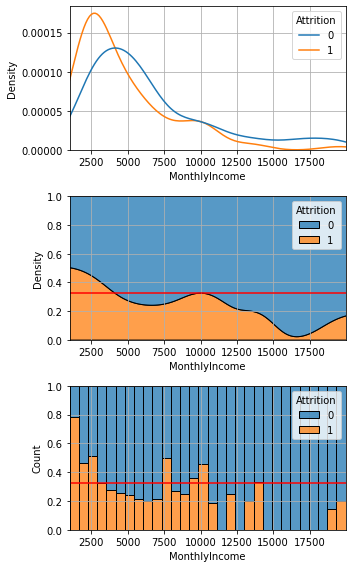

In [83]:
feature = 'MonthlyIncome' 
plt.figure(figsize = (5, 8)) 
plt.subplot(3,1,1) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False) 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,2) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,3) 
sns.histplot(x=feature, data = data, bins = 30, hue ='Attrition', multiple = 'fill') 
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 
plt.tight_layout() 
plt.show()

* 파악된 내용을 기술해 봅시다.

- 수입이 낮을때 이직율이 높은 구간(2500, 700, 10000)이 있고, 수입이 높을수록 이직을 적게한다

## (4) PercentSalaryHike --> Attrition

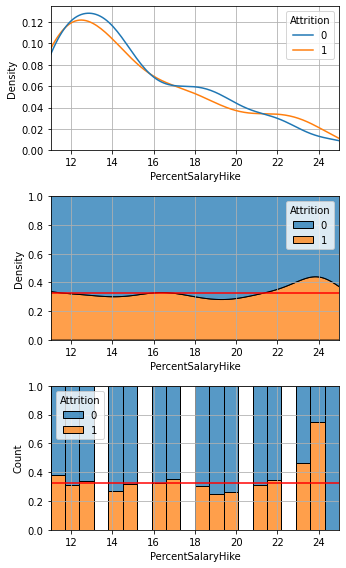

In [86]:
feature = 'PercentSalaryHike' 
plt.figure(figsize = (5, 8)) 
plt.subplot(3,1,1) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False)
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,2) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,3) 
sns.histplot(x=feature, data = data, bins = 20, hue ='Attrition', multiple = 'fill') 
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 
plt.tight_layout() 
plt.show()

* 파악된 내용을 기술해 봅시다.

- 급여인상률이 23~24정도 일때 이직율이 높았다

## (5) TotalWorkingYears --> Attrition

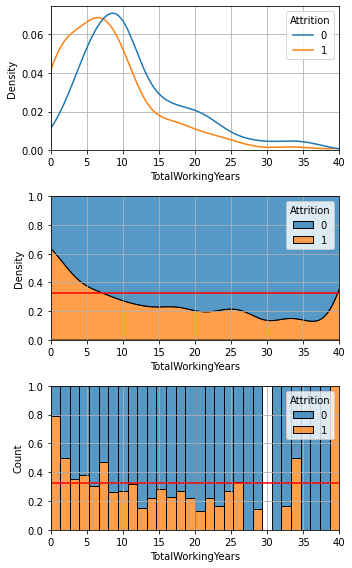

In [85]:
feature = 'TotalWorkingYears' 
plt.figure(figsize = (5, 8)) 
plt.subplot(3,1,1) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', common_norm = False) 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,2) 
sns.kdeplot(x=feature, data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 

plt.subplot(3,1,3) 
sns.histplot(x=feature, data = data, bins = 30, hue ='Attrition', multiple = 'fill') 
plt.axhline(data['Attrition'].mean(), color = 'r') 
plt.xlim(data[feature].min(), data[feature].max())
plt.grid() 
plt.tight_layout() 
plt.show()

* 파악된 내용을 기술해 봅시다.

- 특정연차(1~3, 7, 34)에서 이직율이 높았다
- 정년퇴임 사람일수 있다.

# 4.관계 정리하기

① 강한관계

MaritalStatus, OverTime, age, MonthlyIncome

② 중간관계

JobSatisfaction, DistanceFromHome, PercentSalaryHike

③ 관계없음(약한 관계)

Gender, TotalWorkingYears